**извлечение признаков из текста на естественном языке**

классификатор текстов

Евгений Борисов borisov.e@solarl.ru

## библиотеки

In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [3]:
pd.options.display.max_colwidth = 200  

## тексты

In [4]:
# загружаем тексты
data = pd.read_pickle('../data/text/news.pkl')
print('записей:',len(data))

записей: 3196


In [5]:
data.sample(2)

,text,tag
943,"Комитет по правам человека ООН: Беларусь расстреляла осужденных прежде, чем рассмотрели их жалобы\n\n8 декабря 2016 в 11:50\n\nTUT.BY\n\nЭксперты ООН называют ноябрьские расстрелы приговоренных бе...",social
392,"Где встречают Новый год звезды? До заветной Новогодней ночи еще больше\nмесяца, однако уже известно, где бой часов застанет первых лиц клубной\nпланеты. Тихие семейные радости оказались уделом еди...",culture


## токенизация и очистка

In [6]:
from Stemmer import Stemmer
# pacman -S python-pystemmer
# pip install pystemmer

In [7]:
stopwords= [
    'и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 
    'так', 'его', 'но',  'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 
    'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 
    'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или',  'ни', 'быть', 'был', 'него', 'до', 
    'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 
    'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем',
    'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 
    'ж', 'тогда', 'кто','этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 
    'этом', 'один', 'почти', 'мой', 'тем','чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем',
    'всех', 'никогда', 'можно', 'при', 'наконец', 'два','об', 'другой', 'хоть', 'после', 
    'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них','какая', 'много', 
    'разве', 'три', 'эту', 'моя', 'впрочем', 'хорошо', 'свою', 'этой', 'перед', 'иногда',
    'лучше', 'чуть', 'том', 'нельзя', 'такой', 'им', 'более', 
    'всегда', 'конечно', 'всю', 'между']

In [8]:
def preprocessor(text):
    tt = [ t for t in text.split() if t ]
    tt = [ t.lower()  for t in tt ] # приведение в lowercase
    tt = [ re.sub( r'https?://[\S]+', 'url', t)  for t in tt ]  # замена интернет ссылок
    tt = [ re.sub( r'[\w\./]+\.[a-z]+', 'url', t) for t in tt  ]  # замена интернет ссылок 
    tt = [ re.sub( r'<[^>]*>', '', t)  for t in tt ] # удаление html тагов
    tt = [ re.sub( r'\W', '', t)  for t in tt ] # удаление лишних символов (НЕ буква и НЕ цифра)
    tt = [ t for t in tt if t not in stopwords ] # удаление (предлогов)
    tt = Stemmer('russian').stemWords( tt ) # стемминг, выделение основы слова
    tt = [ re.sub( r'\b\d+\b', 'digit', t ) for t in tt ] # замена цифр
    tt = [ t for t in tt if len(t)>2 ] # удаление коротких слов (предлогов)
    return ' '.join( [ t.strip() for t in tt if t ] )
    

##  CountVectorizer + TF-IDF

In [9]:
# TfidfVectorizer = CountVectorizer + TfidfTransformer

from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(preprocessor=preprocessor)
tf.fit( data['text'] )

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2',
        preprocessor=<function preprocessor at 0x7fe59f792400>,
        smooth_idf=True, stop_words=None, strip_accents=None,
        sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, use_idf=True, vocabulary=None)

In [10]:
# размер словаря
len(tf.vocabulary_)

37614

## формируем датасеты

In [11]:
X = tf.transform( data['text'] ) # .todense()
X.shape

(3196, 37614)

In [12]:
labels = { t:i for i,t in enumerate(sorted(set(data['tag']))) }
labels

{'auto': 0,
 'culture': 1,
 'economics': 2,
 'health': 3,
 'incident': 4,
 'politics': 5,
 'realty': 6,
 'reclama': 7,
 'science': 8,
 'social': 9,
 'sport': 10,
 'tech': 11,
 'woman': 12}

In [13]:
y = data['tag'].map(labels).values
y

array([5, 1, 1, ..., 8, 5, 9])

---

In [14]:
from time import time
def get_seed(): t = time() ; return int(((t%1)/(t//1))*1e11)

In [15]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.9, random_state=get_seed() )
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((319, 37614), (319,), (2877, 37614), (2877,))

## обучаем

In [16]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss='hinge',max_iter=1000)
clf.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

## тестируем

In [17]:
o = clf.predict(X_train)

In [18]:
accuracy_score(y_train,o)

1.0

In [19]:
# print( classification_report(y_train,o) )

---

In [32]:
o = clf.predict(X_test)

In [33]:
accuracy_score(y_test,o)

0.7900590893291624

In [34]:
print( classification_report(y_test,o) )

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       225
           1       0.81      0.79      0.80       327
           2       0.82      0.73      0.77       247
           3       0.89      0.28      0.42        86
           4       0.81      0.92      0.86       398
           5       0.78      0.93      0.85       537
           6       0.70      0.52      0.60        54
           7       0.50      0.07      0.12        46
           8       0.75      0.97      0.84       203
           9       0.48      0.27      0.34       131
          10       0.80      0.98      0.88       330
          11       0.78      0.67      0.72       260
          12       1.00      0.06      0.11        33

   micro avg       0.79      0.79      0.79      2877
   macro avg       0.77      0.61      0.63      2877
weighted avg       0.78      0.79      0.77      2877



---

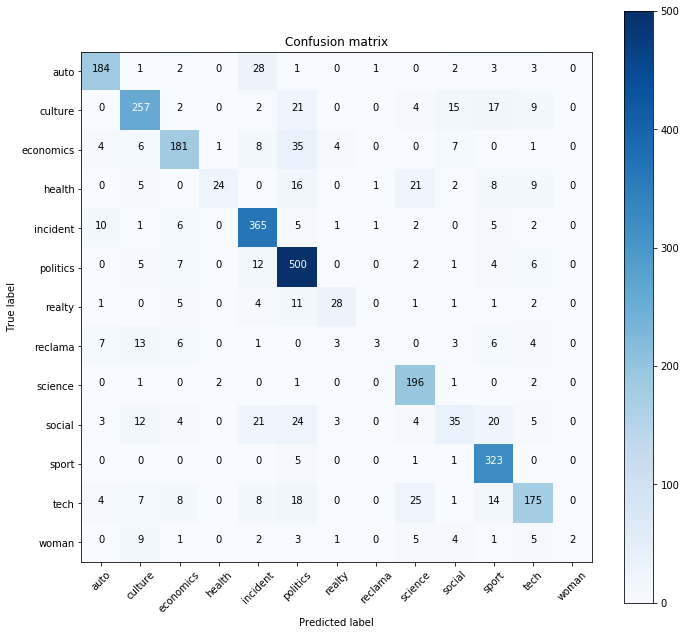

In [35]:
from matplotlib import pyplot as plt
import itertools

plt.figure(figsize=(10,9))
cm = confusion_matrix(y_test,o)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()

classes = sorted(labels.keys())

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

---

In [36]:
o = clf.predict(X)

In [37]:
labels_inv = { labels[k]:k for k in labels}
# labels_inv

In [38]:
i = np.random.randint(len(data))
print('tag:',data.iloc[i,1])
print('predict:',labels_inv[o[i]])
print('- - - - - - - - - - - - - - - - - - \n')
print(data.iloc[i,0])


tag: incident
predict: incident
- - - - - - - - - - - - - - - - - - 

В Витебске в драке возле ночного клуба погиб мужчина

10 декабря 2016 в 17:06

TUT.BY

Во время драки возле одного из ночных клубов в Витебске погиб 32-летний мужчина. Потасовка между посетителями заведения произошла примерно в полчетвертого утра 10 декабря, сообщили TUT.BY в пресс-службе милиции региона.

Между мужчинами произошел конфликт, они вышли на улицу — началась драка. От полученных в ней травм один из участников инцидента скончался.

Изучив записи камеры видеонаблюдения, милиция установила, что телесные повреждения мужчине нанес 30-летний житель Витебска. Его задержали.

Возбуждено уголовное дело, устанавливаются все обстоятельства произошедшего.


---

In [27]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# le.fit(data['tag'])
# print( list(le.classes_) )
# y = le.transform(data['tag']) 

In [28]:
# from sklearn.pipeline import Pipeline
# text_clf = Pipeline([
#                 ('tfidf', TfidfVectorizer()),
#                 ('clf', SGDClassifier(loss='hinge')),
#                 ])
# text_clf.fit()

In [29]:
# from sklearn.model_selection import GridSearchCV

---

In [30]:
# Sebastian Raschka   Python Machine Learning  - Packt Publishing Ltd, 2015